<!-- === UMT Assignment Header (Dark + Centered + Fixed Background) === -->

<div style="background-color:#000000; color:white; padding:25px; border-radius:12px; box-shadow:0 0 12px rgba(0,0,0,0.5); font-family:'Segoe UI',sans-serif;">

  <table style="width:100%; border-collapse:collapse;">
    <tr>
      <td style="width:20%; text-align:center; vertical-align:middle; font-size:30px; font-weight:bold; color:#3b82f6;">
        UMT
      </td>
      <td style="text-align:center;">
        <div style="font-size:22px; font-weight:bold; color:#93c5fd;">University of Management and Technology</div>
        <div style="font-size:18px; color:#e0f2fe; margin-top:4px;">Deep Learning & Neural Networks</div>
        <div style="font-size:17px; color:#cbd5e1; margin-top:2px;">Assignment 1</div>
      </td>
    </tr>
  </table>

  <hr style="border:1px solid #1e3a8a; margin:18px 0;">

  <table style="width:100%; border-collapse:collapse; font-size:16px;">
    <tr>
      <td style="padding:8px; color:#e2e8f0;"><b>Student Name:</b></td>
      <td style="padding:8px; color:#f8fafc;">Syed Shahzil Abbas</td>
      <td style="padding:8px; color:#e2e8f0;"><b>ID:</b></td>
      <td style="padding:8px; color:#f8fafc;">23018020020</td>
    </tr>
    <tr style="background-color:#1e3a8a;">
      <td style="padding:8px; color:#e2e8f0;"><b>Program:</b></td>
      <td style="padding:8px; color:#f8fafc;">BSCS (A)</td>
      <td style="padding:8px; color:#e2e8f0;"><b>Semester:</b></td>
      <td style="padding:8px; color:#f8fafc;">Fall 2025</td>
    </tr>
    <tr>
      <td style="padding:8px; color:#e2e8f0;"><b>Resource Person:</b></td>
      <td style="padding:8px; color:#f8fafc;">Ms Hina Tufail</td>
      <td style="padding:8px; color:#e2e8f0;"><b>Due Date:</b></td>
      <td style="padding:8px; color:#f8fafc;">18 / 11 / 25</td>
    </tr>
    <tr style="background-color:#1e3a8a;">
      <td style="padding:8px; color:#e2e8f0;"><b>Composed Date:</b></td>
      <td style="padding:8px; color:#f8fafc;">10 / 11 / 25</td>
      <td></td>
      <td></td>
    </tr>
  </table>
</div>

### **_KeyTasks_:**
- Linear Regression (mobile_prices_2023.csv)
- Logistic Regression (phone_calls.csv)

### <span style="color:blue">**_Applying Linear Regression on Realestate Dataset_**</span>
- Loading Dataset
- Dataset Spliting 
- h_function()
- cost_function()
- gradient_descent()
- plot_data()

#### **_Importing Libraries_**


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### **_Loading and Spliting Dataset_**
- 70% Train, 30% Test
- I've preprocessed data seprately so I'm loading the cleaned dataset to be trained on **Linear Regression**

In [5]:
data= pd.read_csv("Realestate_processed.csv")
X= data[["X1_year","X1_month_sin","X1_month_cos","X2_house_age","X3_scaled","X4_scaled","distance_scaled"]]
Y= data['Y_house_price_of_unit_area']
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.3, random_state=20)


### **_Cost Function_**
- It calculates sum of losses to compute overall cost of model.

In [6]:
def cost_func(x, y, w, b): 
    """
    cost_func computes the cost for linear regression
    Args:
      x (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      cost (scalar): cost
    """
    m = x.shape[0]
    f_wb= np.dot(x, w) + b
    cost = (1/(2*m)) * np.sum((f_wb - y)**2)                                    #scalar    
    return cost

### **_Gradiant Descent_**
- This will involve gradiant calculation.
- Multiplying gradiants with learning rate.
- Updating Paramerters.

In [7]:
def compute_gradient(x, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar):       The gradient of the cost w.r.t. the parameter b. 
    """
    m,n = x.shape           #(number of examples, number of features)
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):                             
        err = (np.dot(x[i], w) + b) - y[i]   
        for j in range(n):                         
            dj_dw[j] = dj_dw[j] + err * x[i, j]    
        dj_db = dj_db + err                        
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m                                
        
    return dj_db, dj_dw

In [8]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters): 
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x (ndarray (m,n))   : Data, m examples with n features
      y (ndarray (m,))    : target values
      w_in (ndarray (n,)) : initial model parameters  
      b_in (scalar)       : initial model parameter
      cost_function       : function to compute cost
      gradient_function   : function to compute the gradient
      alpha (float)       : Learning rate
      num_iters (int)     : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,)) : Updated values of parameters 
      b (scalar)       : Updated value of parameter 
      """
    
    cost_history = []
    w = w_in
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db,dj_dw =compute_gradient(x, y, w, b)   ##None

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               ##None
        b = b - alpha * dj_db               ##None
        if i<100000:      # prevent resource exhaustion 
            cost_history.append( cost_func(x, y, w, b))
            print(f"Gradient {i+1}- cost={cost_history[-1]}")  
    return w, b, cost_history


### **_h_function()_**
- Performs predictions on training data

In [9]:
def h_function(x, w, b):
    """
    h_function performs predictions on training data
    Args:
      x (ndarray (m,n)): Data, m examples with n features
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      predictions (ndarray (m,)): predicted values
    """
    predictions = np.dot(x, w) + b
    return predictions

In [10]:
from sklearn.metrics import r2_score

In [12]:
w, b, cost_history = gradient_descent(np.array(X_train), np.array(Y_train),np.zeros(X_train.shape[1]), 0.0, 1, 50)
predictions = h_function(np.array(X_train), w, b)
Accuracy= r2_score(Y_train, predictions)
print("R2 Score on Training Data: ", Accuracy*100)
predictions2 = h_function(np.array(X_test), w, b)
Accuracy2= r2_score(Y_test, predictions2)
print("R2 Score on Test Data: ", Accuracy2*100)



Gradient 1- cost=91.66642793344653
Gradient 2- cost=48.683787155912626
Gradient 3- cost=45.3512793226635
Gradient 4- cost=44.606879932911006
Gradient 5- cost=44.15019827917998
Gradient 6- cost=43.80548241503333
Gradient 7- cost=43.5366511828921
Gradient 8- cost=43.32322484967995
Gradient 9- cost=43.150750865362305
Gradient 10- cost=43.00879389275358
Gradient 11- cost=42.88978964871357
Gradient 12- cost=42.78823953711604
Gradient 13- cost=42.70013296899245
Gradient 14- cost=42.62253219998499
Gradient 15- cost=42.55327385716123
Gradient 16- cost=42.49075429662976
Gradient 17- cost=42.43377519261333
Gradient 18- cost=42.38143240598751
Gradient 19- cost=42.33303595483834
Gradient 20- cost=42.28805233913131
Gradient 21- cost=42.24606293503667
Gradient 22- cost=42.206733943982655
Gradient 23- cost=42.169794652594454
Gradient 24- cost=42.13502167273725
Gradient 25- cost=42.10222748677444
Gradient 26- cost=42.071252094320485
Gradient 27- cost=42.04195689524846
Gradient 28- cost=42.014220186881

### **_Ploting Cost Function_**

Text(0.5, 1.0, 'Cost Function Convergence')

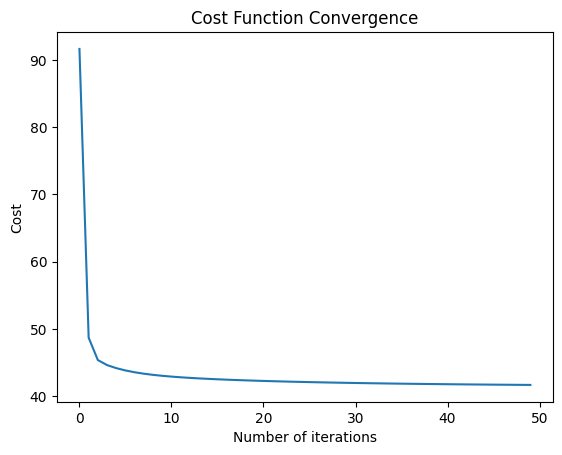

In [13]:
plt.plot(range(len(cost_history)), cost_history)
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.title("Cost Function Convergence")

In [14]:
def plot_regression_plane_3d(X_train, y_train, X_test, y_test, w, b,
                             feat_idx=(0,1), feature_names=None,
                             fixed_values=None, grid_res=40, cmap='coolwarm',
                             alpha=0.6, point_size=40, show=True):
    """
    Plot a single 3D regression plane (predicted surface) for two selected features
    and overlay TRAIN and TEST points colored by actual target.

    Args:
      X_train, X_test : array-like (m,n)
      y_train, y_test : array-like (m,)
      w               : array-like (n,) weights
      b               : scalar bias
      feat_idx        : tuple (i,j) indices of two features to plot on X/Y axes
      feature_names   : list-like of length n for axis labels (optional)
      fixed_values    : None (use means) or array-like length n or dict {idx:val}
      grid_res        : resolution of the surface grid (int)
      cmap, alpha, point_size : plotting options
      show            : if True call plt.show()

    Returns:
      fig, ax (matplotlib objects)
    """
    import numpy as np
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D  # noqa: F401

    Xtr = np.asarray(X_train)
    Xte = np.asarray(X_test)
    ytr = np.asarray(y_train).reshape(-1)
    yte = np.asarray(y_test).reshape(-1)
    w = np.asarray(w).reshape(-1)

    if Xtr.ndim == 1:
        Xtr = Xtr.reshape(-1, 1)
        Xte = Xte.reshape(-1, 1)

    m, n = Xtr.shape
    i, j = feat_idx
    if not (0 <= i < n and 0 <= j < n and i != j):
        raise ValueError("feat_idx must be two distinct valid feature indices")

    # determine fixed values for non-plotted features
    combined = np.vstack([Xtr, Xte])
    if fixed_values is None:
        fixed = np.mean(combined, axis=0)
    elif isinstance(fixed_values, dict):
        fixed = np.mean(combined, axis=0)
        for k, v in fixed_values.items():
            fixed[k] = v
    else:
        fixed = np.asarray(fixed_values).ravel()
        if fixed.size != n:
            raise ValueError("fixed_values must have length equal to number of features")

    # grid for the two features
    xi = np.linspace(np.min(np.vstack([Xtr[:, i], Xte[:, i]])),
                     np.max(np.vstack([Xtr[:, i], Xte[:, i]])), grid_res)
    xj = np.linspace(np.min(np.vstack([Xtr[:, j], Xte[:, j]])),
                     np.max(np.vstack([Xtr[:, j], Xte[:, j]])), grid_res)
    XI, XJ = np.meshgrid(xi, xj)

    # build grid rows (grid_res^2 x n)
    X_grid = np.tile(fixed, (XI.size, 1))
    X_grid[:, i] = XI.ravel()
    X_grid[:, j] = XJ.ravel()
    Z = (X_grid.dot(w) + b).reshape(XI.shape)

    # color range from actual y values
    all_y = np.concatenate([ytr, yte])
    vmin, vmax = np.min(all_y), np.max(all_y)

    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    # surface colored by predicted value
    surf = ax.plot_surface(XI, XJ, Z, cmap=cmap, alpha=alpha, linewidth=0, antialiased=True)

    # overlay train/test points colored by actual target
    ax.scatter(Xtr[:, i], Xtr[:, j], ytr, c=ytr, cmap=cmap, vmin=vmin, vmax=vmax,
               edgecolor='k', s=point_size, label='Train')
    ax.scatter(Xte[:, i], Xte[:, j], yte, c=yte, cmap=cmap, vmin=vmin, vmax=vmax,
               marker='^', edgecolor='k', s=point_size, label='Test')

    ax.set_xlabel(feature_names[i] if feature_names is not None else f'X[{i}]')
    ax.set_ylabel(feature_names[j] if feature_names is not None else f'X[{j}]')
    ax.set_zlabel('y (target)')
    ax.set_title('3D Regression Plane with Train/Test points')
    ax.legend()
    fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10, label='Predicted value')
    plt.tight_layout()
    if show:
        plt.show()
    return fig, ax

In [15]:
fig, ax = plot_regression_plane_3d(X_train, Y_train, X_test, Y_test, w, b,
                                   feat_idx=(0,1), feature_names=X.columns,                         grid_res=40, cmap='coolwarm', alpha=0.6, point_size=40)
plt.show()

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 289 and the array at index 1 has size 125

**_<span style="color:blue">Logistic Regression</span>_**
- Data Preprocessing for **Bank_Customer_Churn_Prediction.csv**
- Spliting Daaset
- Cost Function
- Gradient Descent
- h_function
- Plot Regression line

In [9]:
data2=pd.read_csv("Bank_Customer_Churn_Prediction.csv")
print(data2.isnull().sum())


customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64


In [10]:
print(data2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB
None


In [ ]:
data2=pd.get_dummies(data2,columns=['country','gender'], drop_first=True)



In [12]:
print(data2.head())


   customer_id  credit_score  age  tenure    balance  products_number  \
0     15634602           619   42       2       0.00                1   
1     15647311           608   41       1   83807.86                1   
2     15619304           502   42       8  159660.80                3   
3     15701354           699   39       1       0.00                2   
4     15737888           850   43       2  125510.82                1   

   credit_card  active_member  estimated_salary  churn  country_Germany  \
0            1              1         101348.88      1            False   
1            0              1         112542.58      0            False   
2            1              0         113931.57      1            False   
3            0              0          93826.63      0            False   
4            1              1          79084.10      0            False   

   country_Spain  gender_Male  
0          False        False  
1           True        False  
2          Fal

In [15]:
data2[['gender_Male','country_Spain','country_Germany']]= data2[['gender_Male','country_Spain','country_Germany']].astype(int)


In [16]:
print(data2.head())


   customer_id  credit_score  age  tenure    balance  products_number  \
0     15634602           619   42       2       0.00                1   
1     15647311           608   41       1   83807.86                1   
2     15619304           502   42       8  159660.80                3   
3     15701354           699   39       1       0.00                2   
4     15737888           850   43       2  125510.82                1   

   credit_card  active_member  estimated_salary  churn  country_Germany  \
0            1              1         101348.88      1                0   
1            0              1         112542.58      0                0   
2            1              0         113931.57      1                0   
3            0              0          93826.63      0                0   
4            1              1          79084.10      0                0   

   country_Spain  gender_Male  
0              0            0  
1              1            0  
2             

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numeric_features = ['credit_score','age','tenure', 'balance', 'products_number','estimated_salary']
data2[numeric_features] = scaler.fit_transform(data2[numeric_features])


In [19]:
data2[['country_Spain','country_Germany','gender_Male','credit_card','active_member','age','tenure','credit_score','balance','products_number','estimated_salary','churn']].to_csv("Bank_Customer_Churn_Prediction_Processed.csv", index=False)
